In [638]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
%matplotlib inline
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
df = pd.read_csv(url)

In [639]:
df.shape

(205, 26)

In [640]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [642]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [643]:
df.duplicated().sum()

0

In [644]:
df['CarName'].value_counts()

CarName
toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                    

In [645]:
df['CompanyName'] = df['CarName'].str.split(' ').str[0]

In [646]:
del df['CarName']

In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [648]:
df['CompanyName'].value_counts()

CompanyName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [649]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [650]:
df['CompanyName'].replace('maxda','mazda',inplace = True)
df['CompanyName'].replace('Nissan','nissan',inplace = True)
df['CompanyName'].replace('porcshce','porsche',inplace = True)
df['CompanyName'].replace('toyouta','toyota',inplace = True)
df['CompanyName'].replace('vokswagen','volkswagen',inplace = True)
df['CompanyName'].replace('vw','volkswagen',inplace = True)

In [651]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

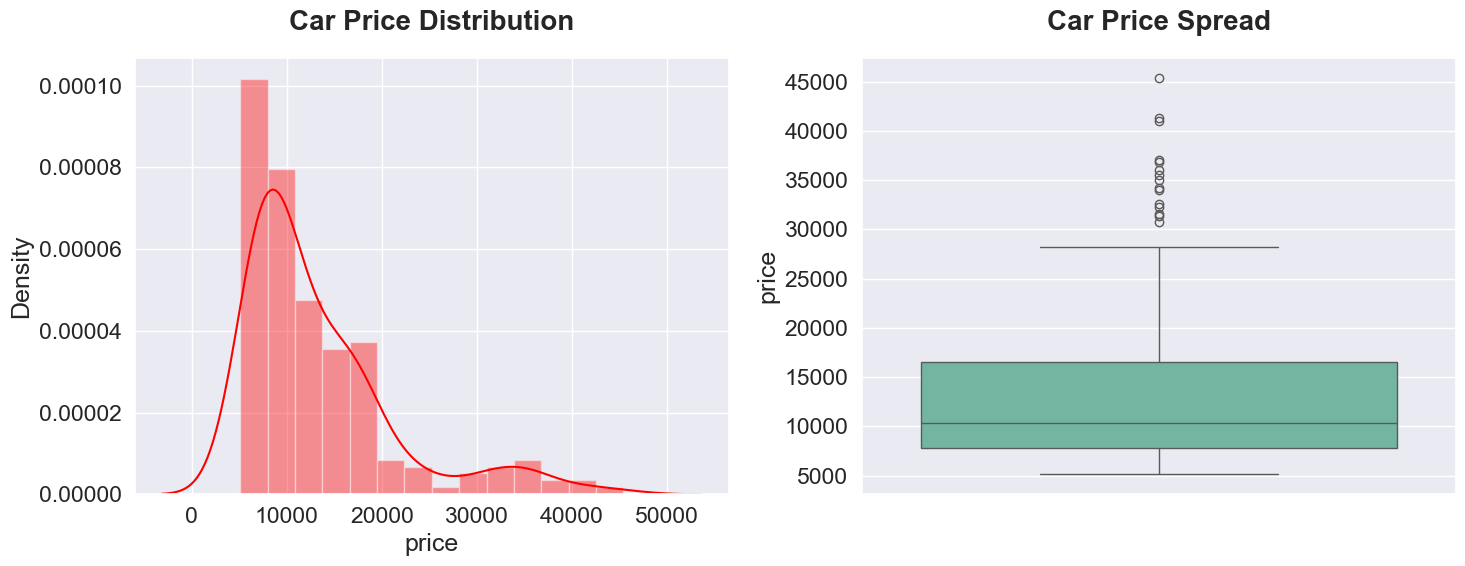

In [652]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [653]:
#可以由上直方图得出汽车价格是右偏的，大多数汽车的价格集中在较低的范围，而价格较高的汽车数量较少。
#由箱图可知说明大部分汽车的价格集中在[10,000-15,000]这个区间,中位数位于约 12,000 左右。

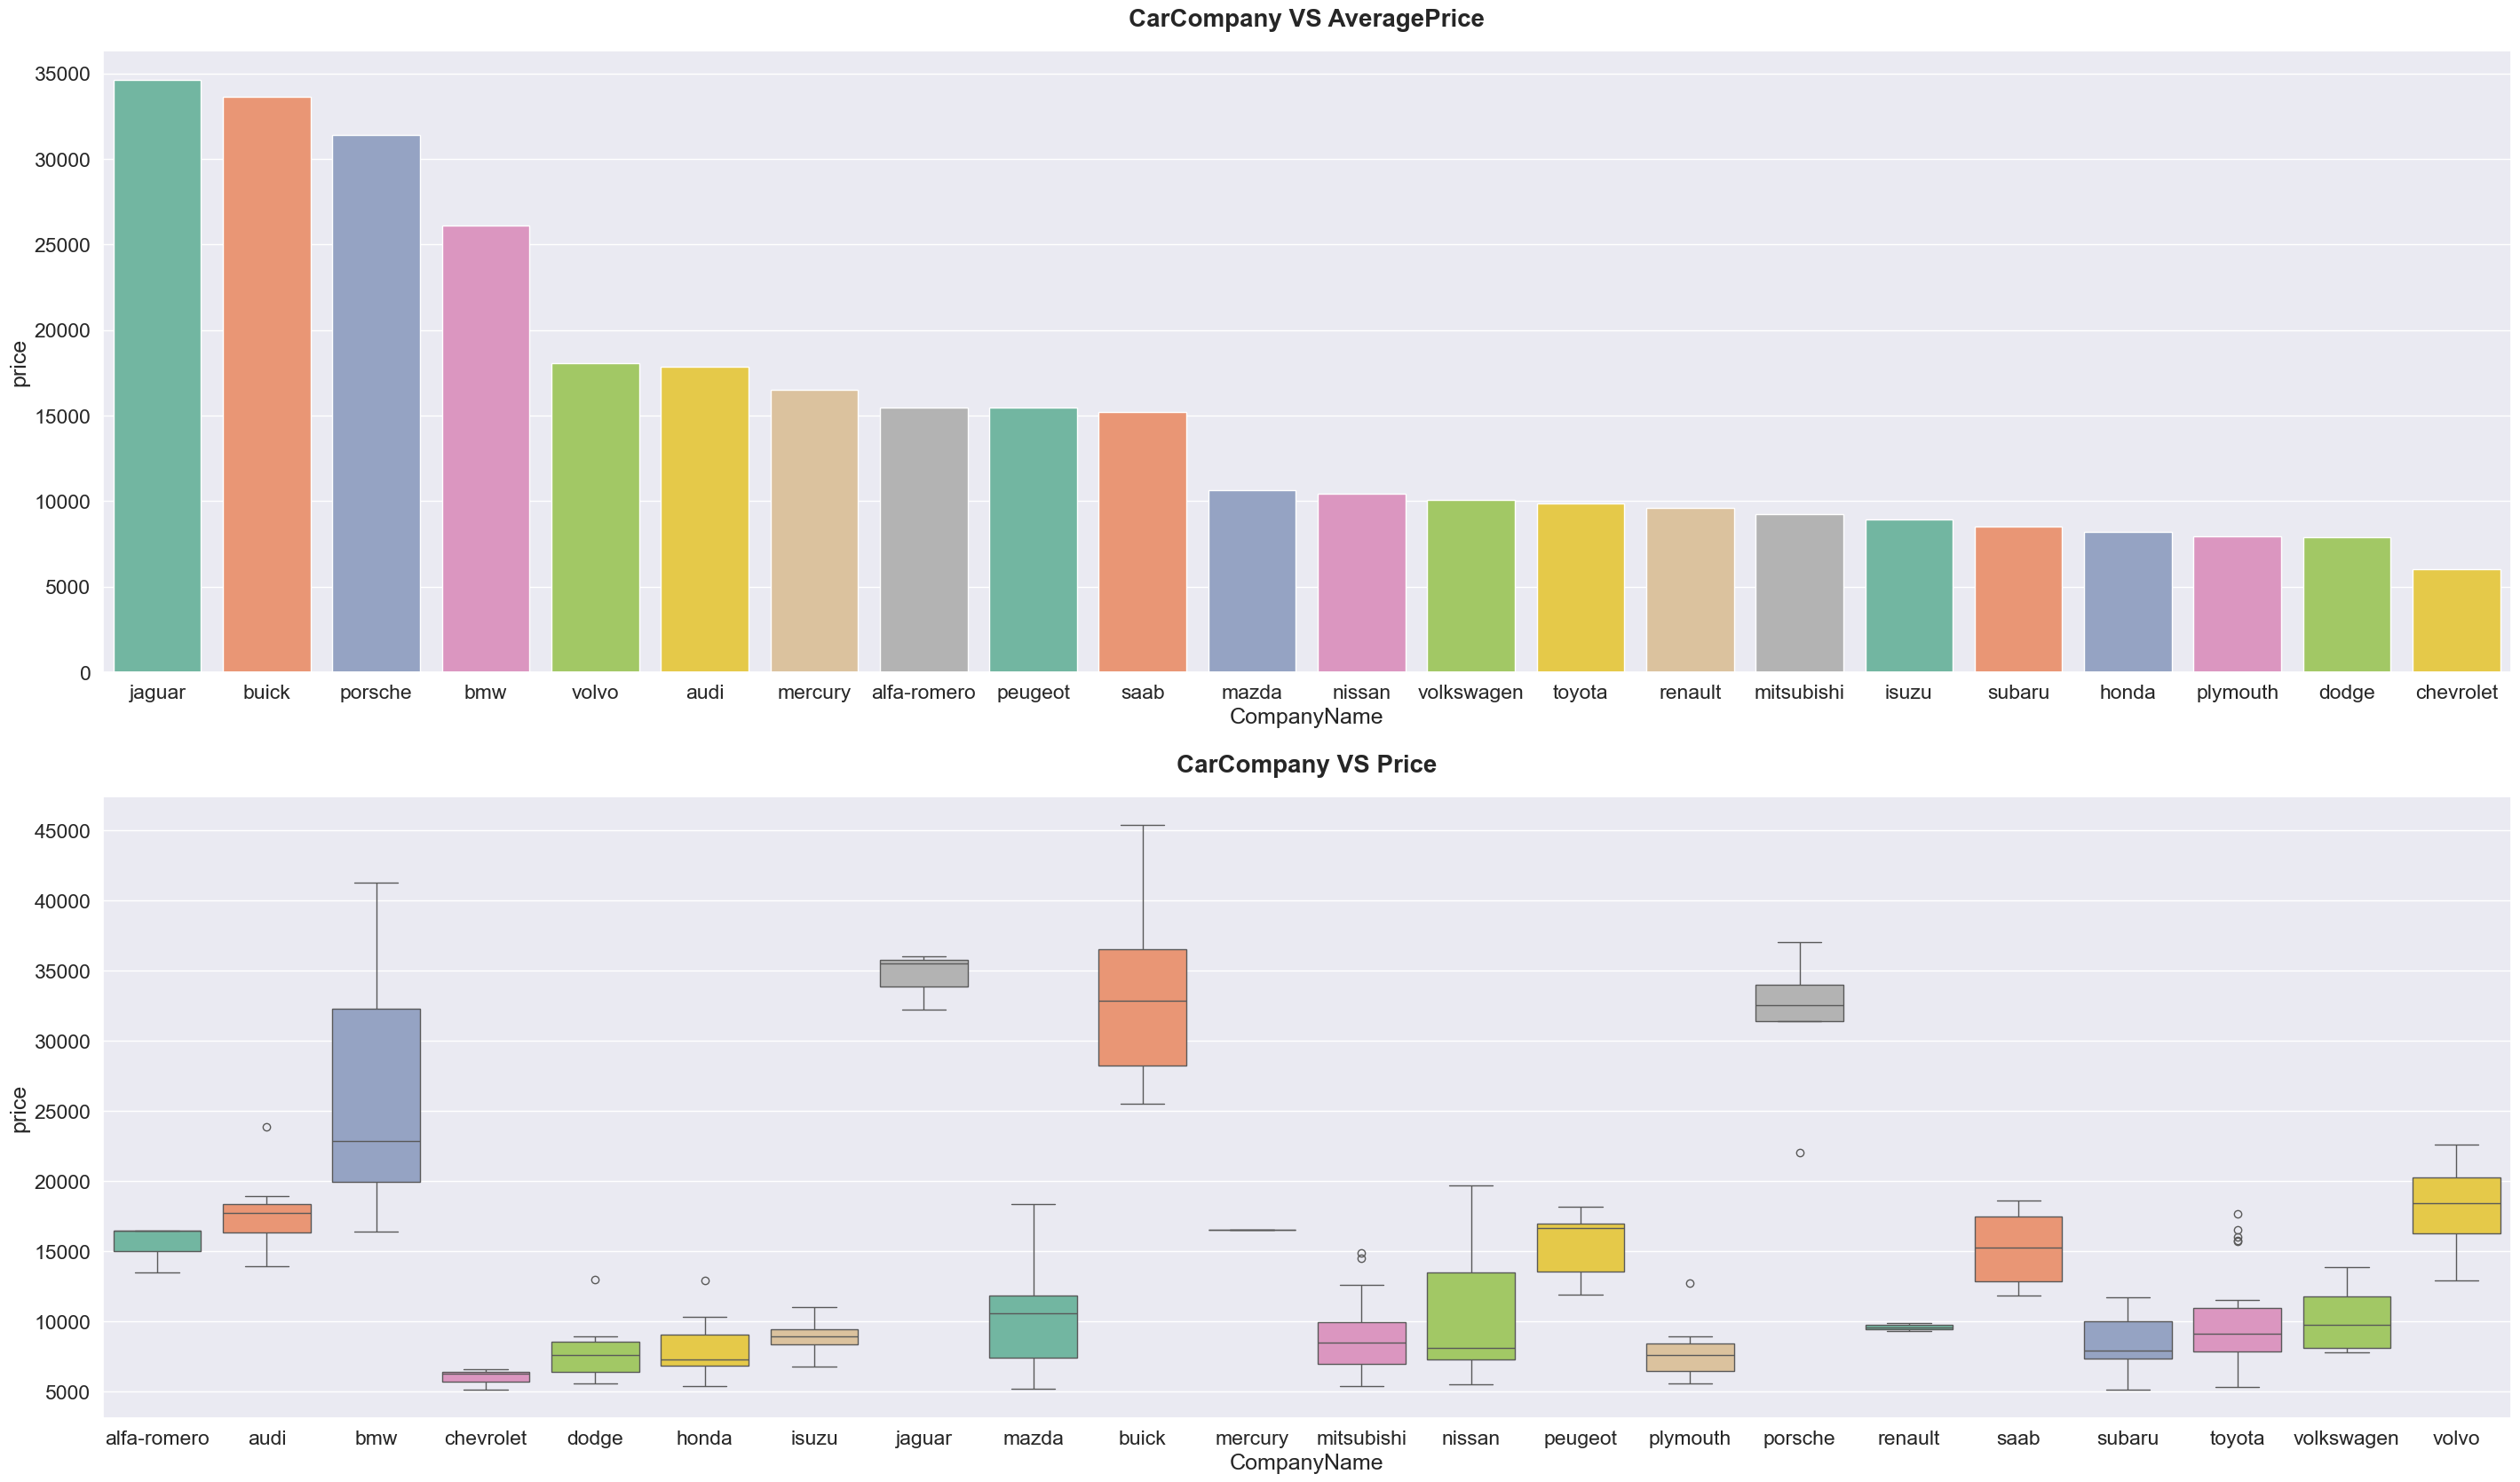

In [654]:
plt.figure(figsize=(35,20))
plt.subplot(2,1,1)
x=pd.DataFrame(df.groupby('CompanyName')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title("CarCompany VS AveragePrice",fontweight='black',fontsize=20,pad=20)
plt.subplot(2,1,2)
sns.boxplot(x='CompanyName',y='price',data=df,palette="Set2")
plt.title("CarCompany VS Price",fontweight='black',fontsize=20,pad=20)
plt.show()

In [655]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    #绘制计数图以查看该属性的分布情况
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",fontweight="black",pad=20,fontsize=20)
    #对比属性不同取值之间的分布情况
    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} VS Prices",fontweight="black",pad=20,fontsize=20)
    #对比属性不同取值之间的均值情况
    plt.subplot(1,3,3)
    x = pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} VS AveragePrices",fontweight="black",pad=20,fontsize=20)
    plt.show()

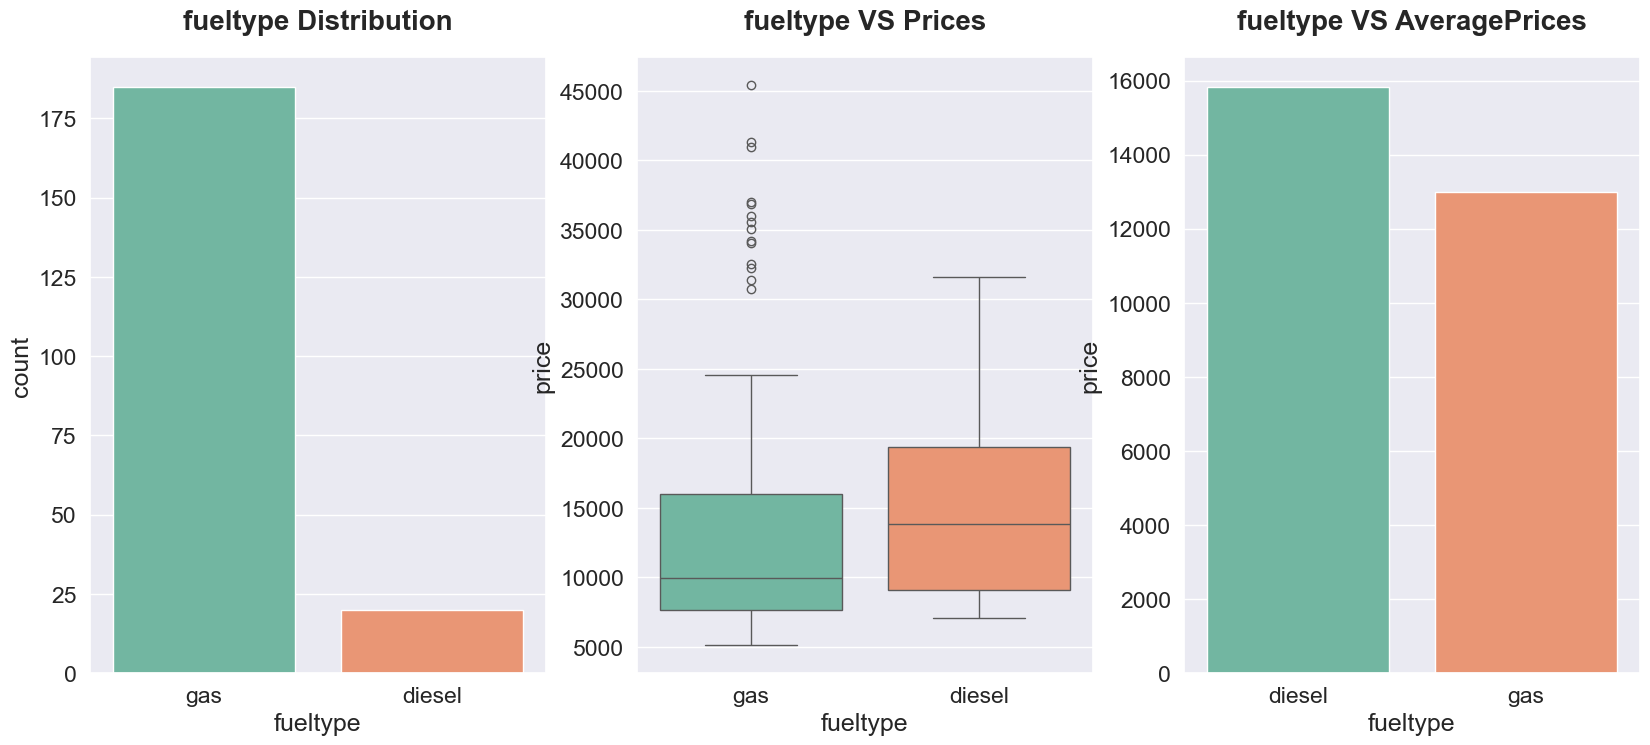

In [656]:
#categorical_column=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','symboling']
categorical_visualization("fueltype")

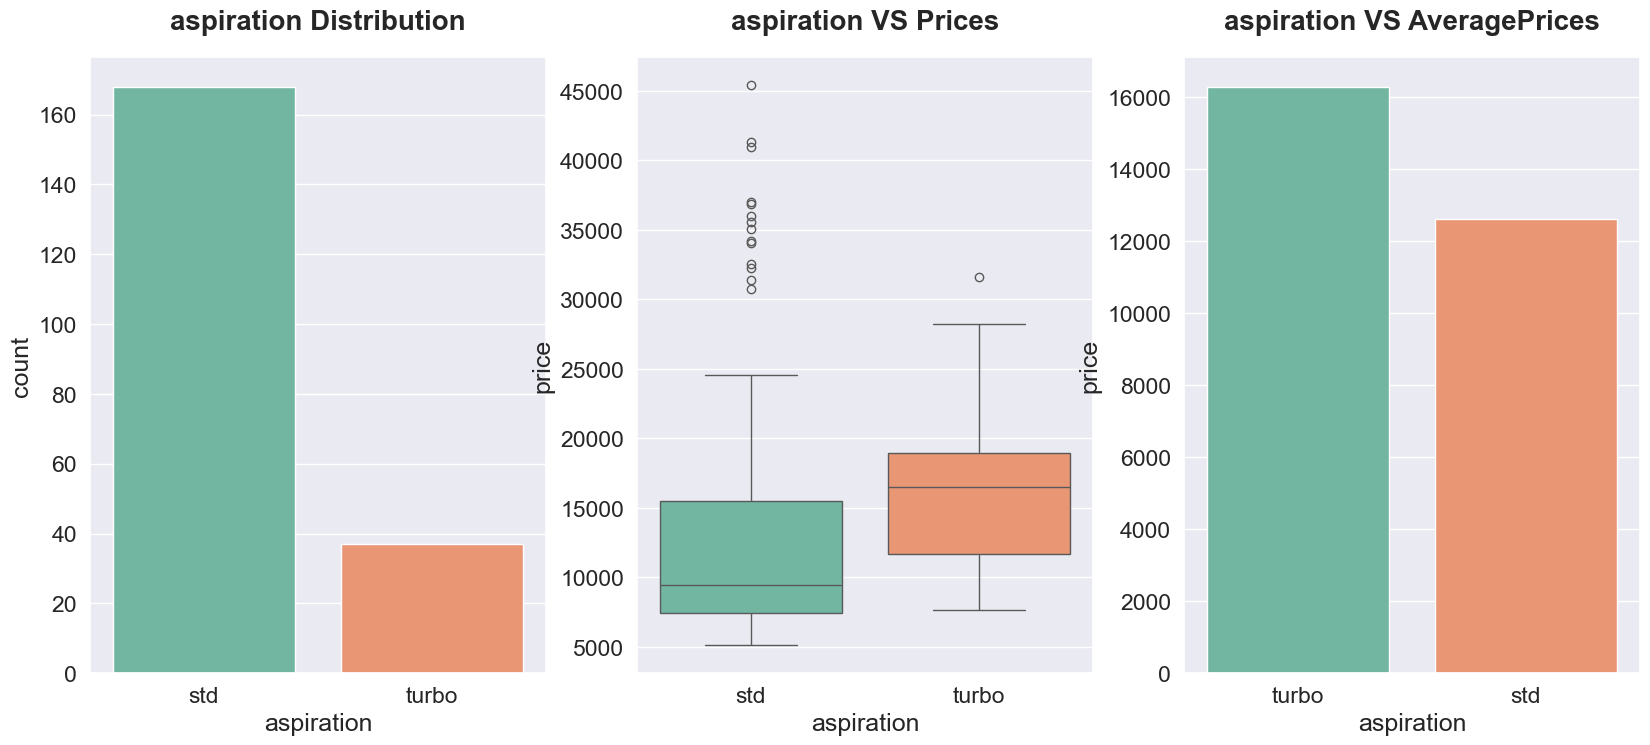

In [657]:
categorical_visualization("aspiration")

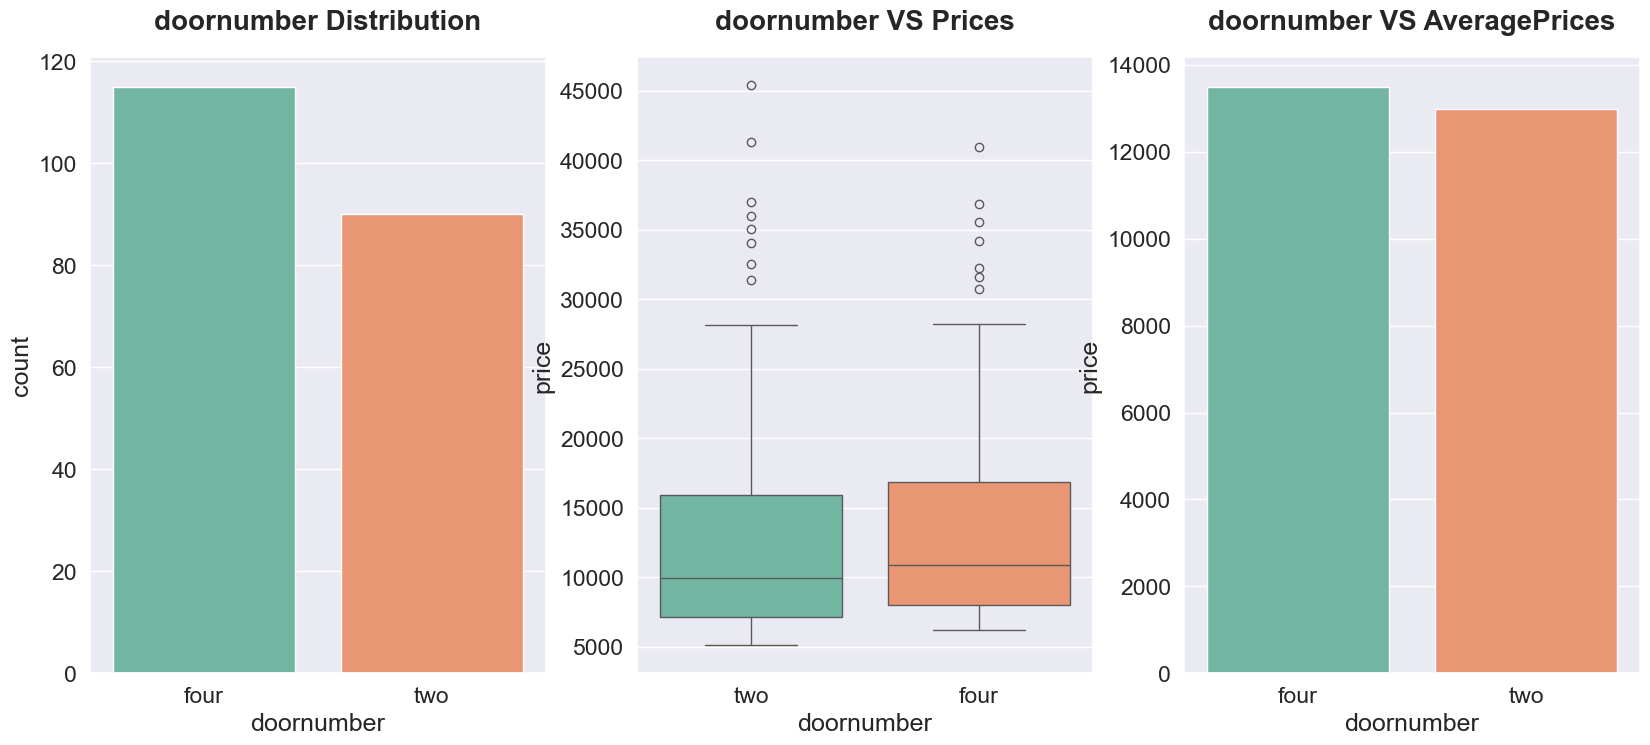

In [658]:
categorical_visualization("doornumber")

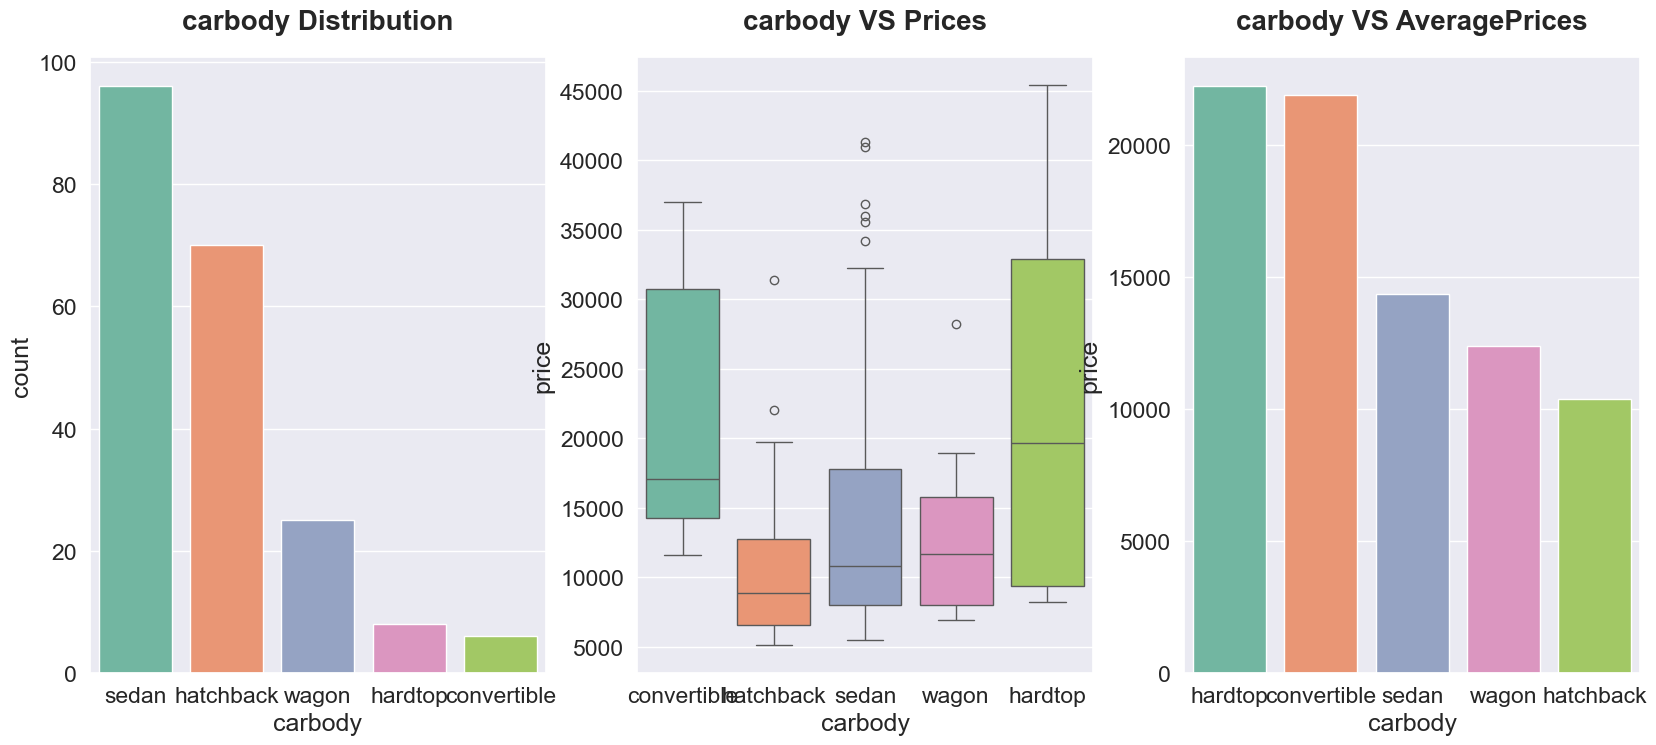

In [659]:
categorical_visualization("carbody")

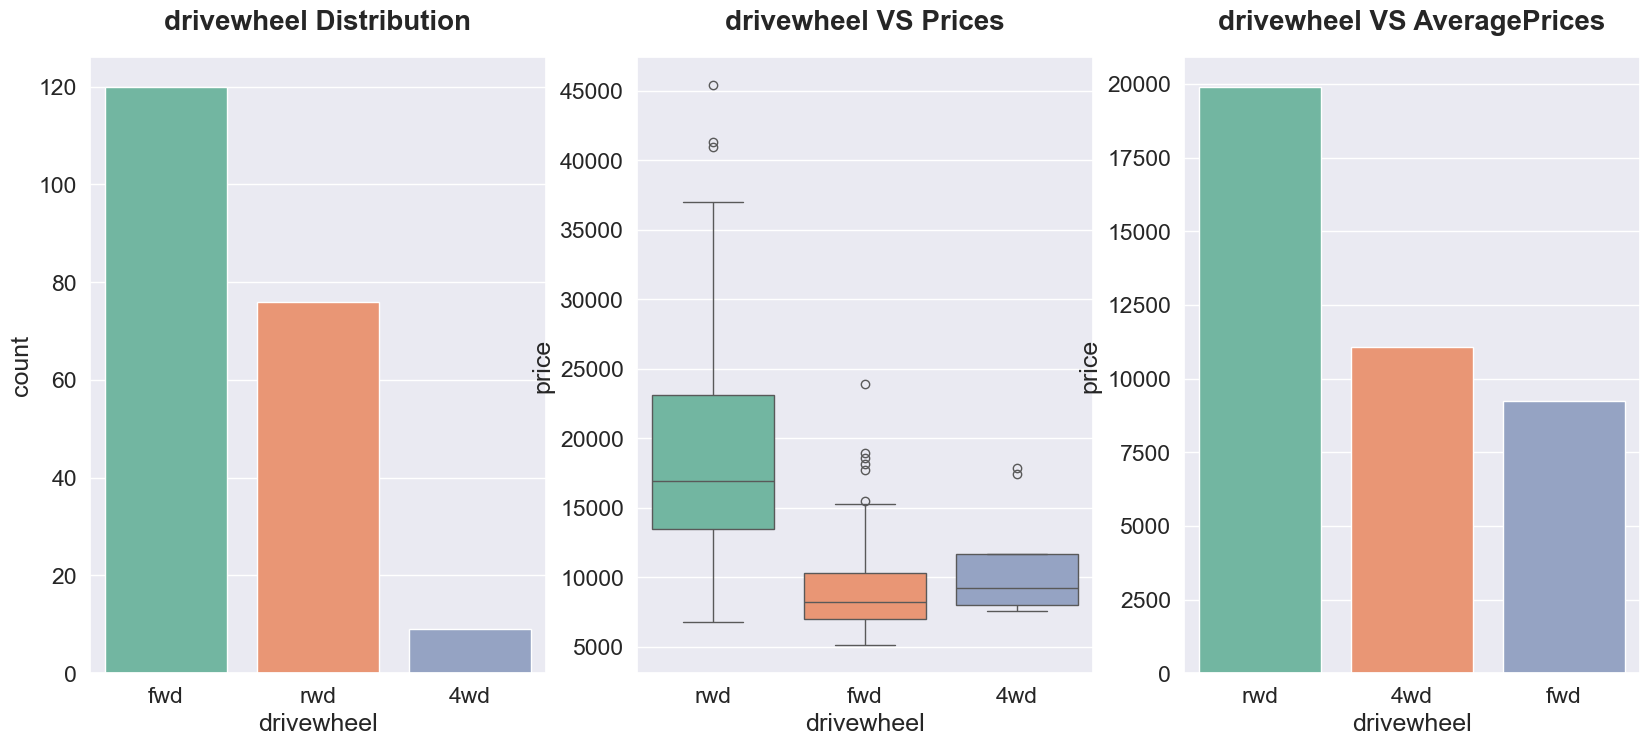

In [660]:
categorical_visualization("drivewheel")

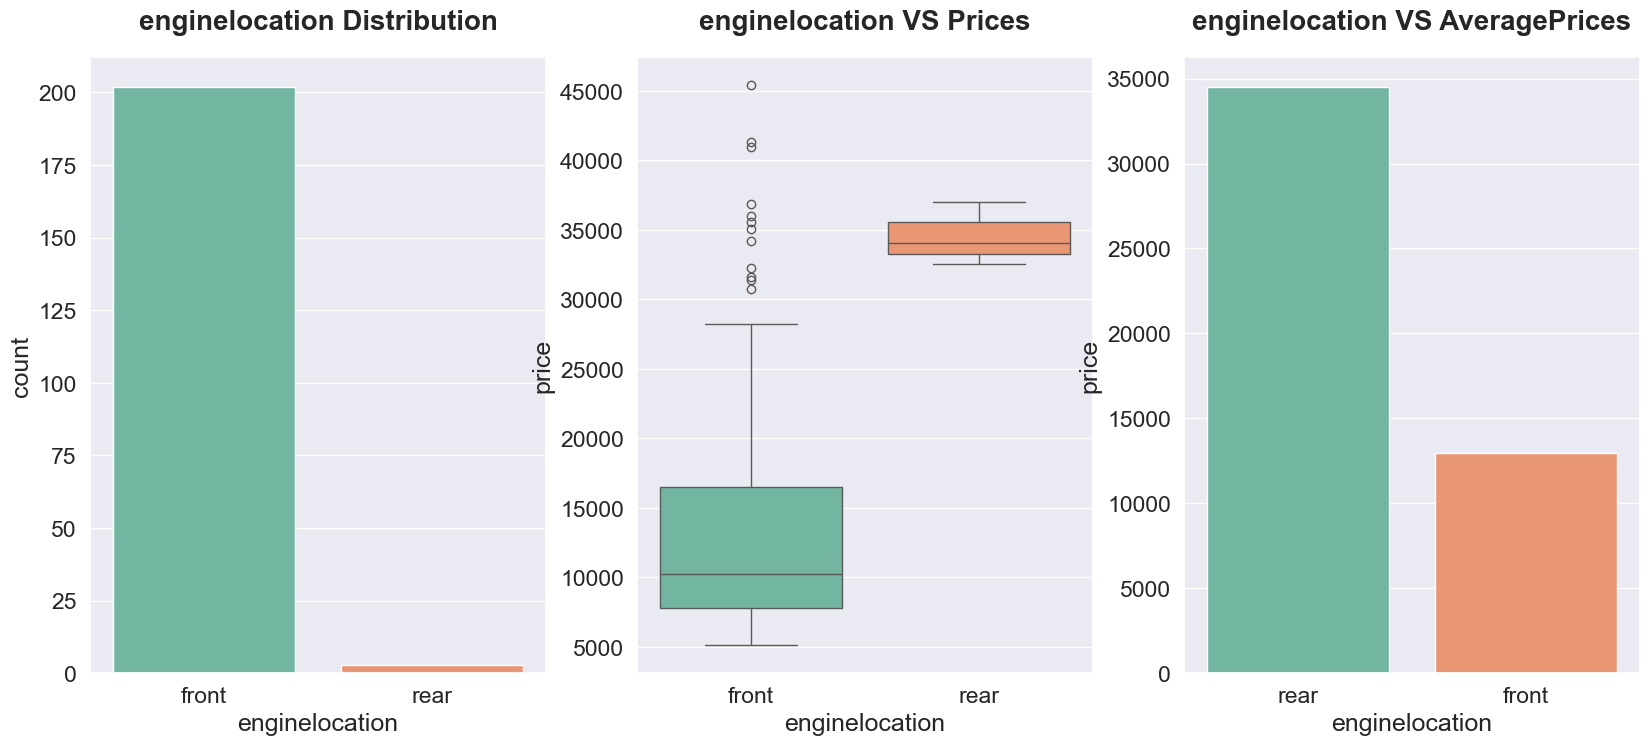

In [661]:
categorical_visualization("enginelocation")

In [662]:
df[df['enginelocation']=='rear']
#由于汽车引擎位置位于后面的汽车数据过少，只有3条，可能会引起过拟合问题，因此要剔除该属性

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
126     127          3      gas        std        two      hardtop        rwd   
127     128          3      gas        std        two      hardtop        rwd   
128     129          3      gas        std        two  convertible        rwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
126           rear       89.5      168.9      65.0       51.6        2756   
127           rear       89.5      168.9      65.0       51.6        2756   
128           rear       89.5      168.9      65.0       51.6        2800   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
126       ohcf            six         194       mpfi       3.74     2.9   
127       ohcf            six         194       mpfi       3.74     2.9   
128       ohcf            six         194       mpfi       3.74     2.9   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
126               9.5         207     5900       17          25  32528.0   
127               9.5         207     5900       17          25  34028.0   
128               9.5         207     5900       17          25  37028.0   

    CompanyName  
126     porsche  
127     porsche  
128     porsche

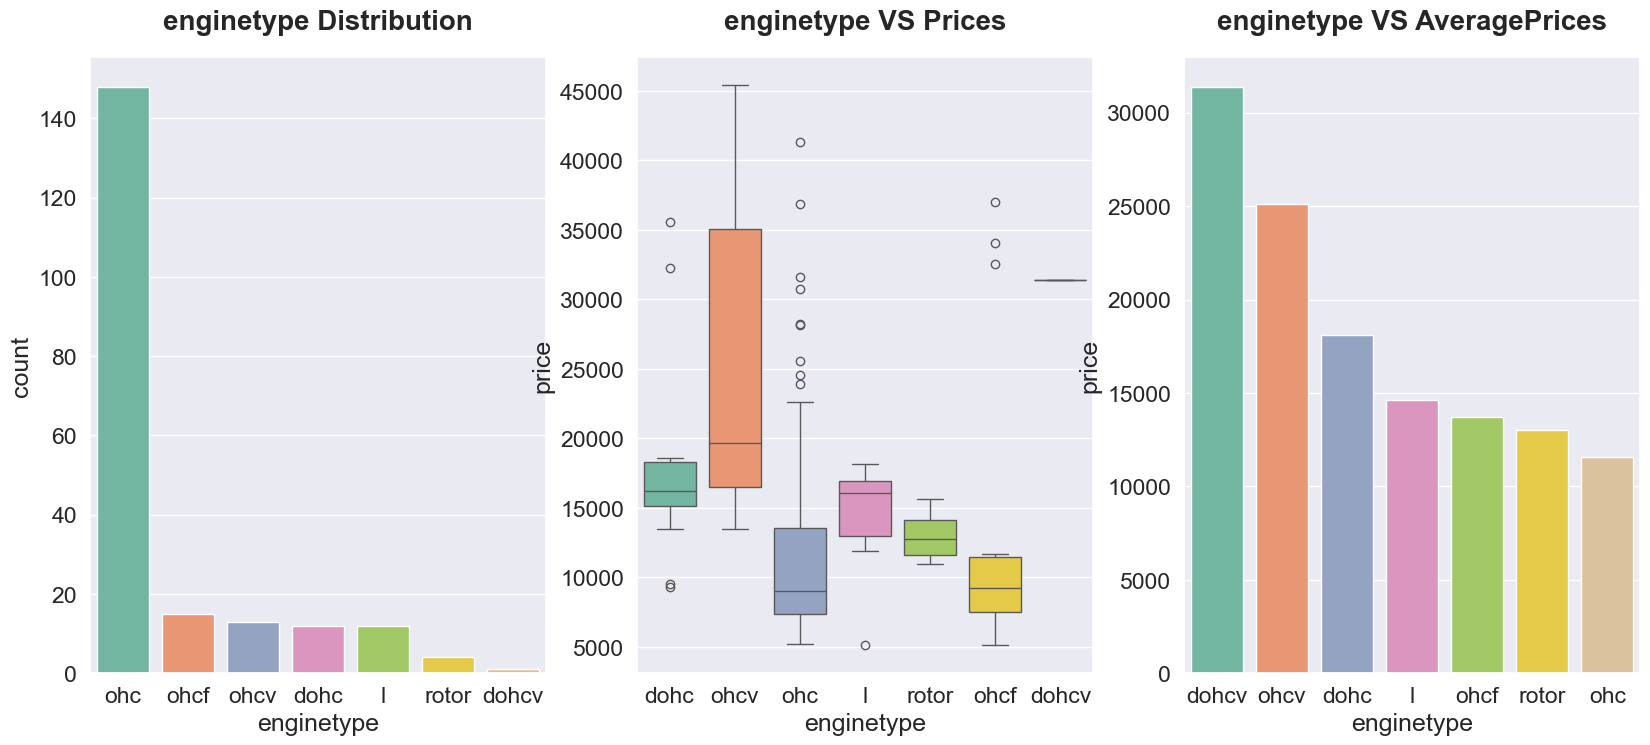

In [663]:
categorical_visualization("enginetype")

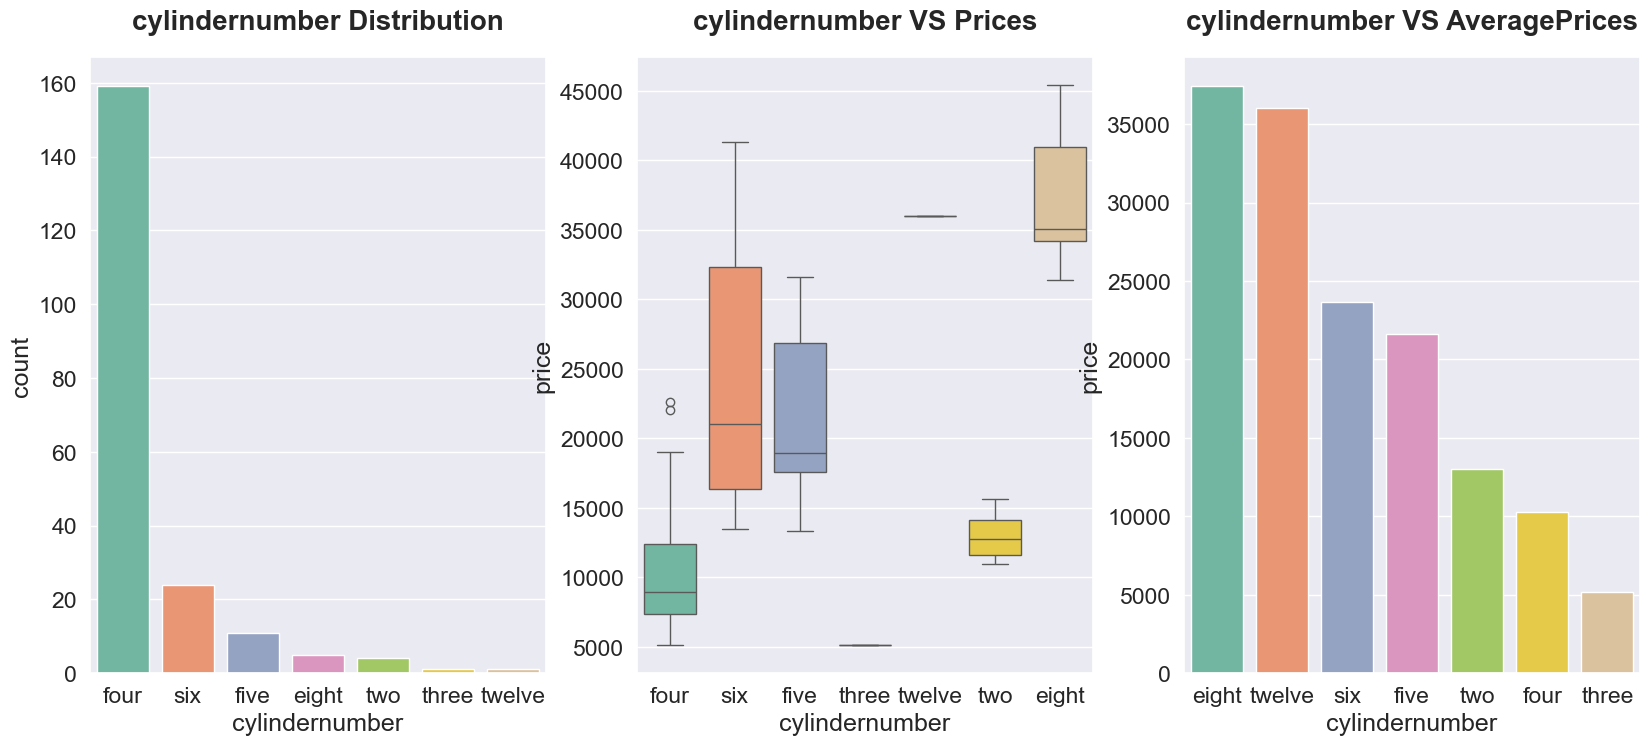

In [664]:
categorical_visualization("cylindernumber")

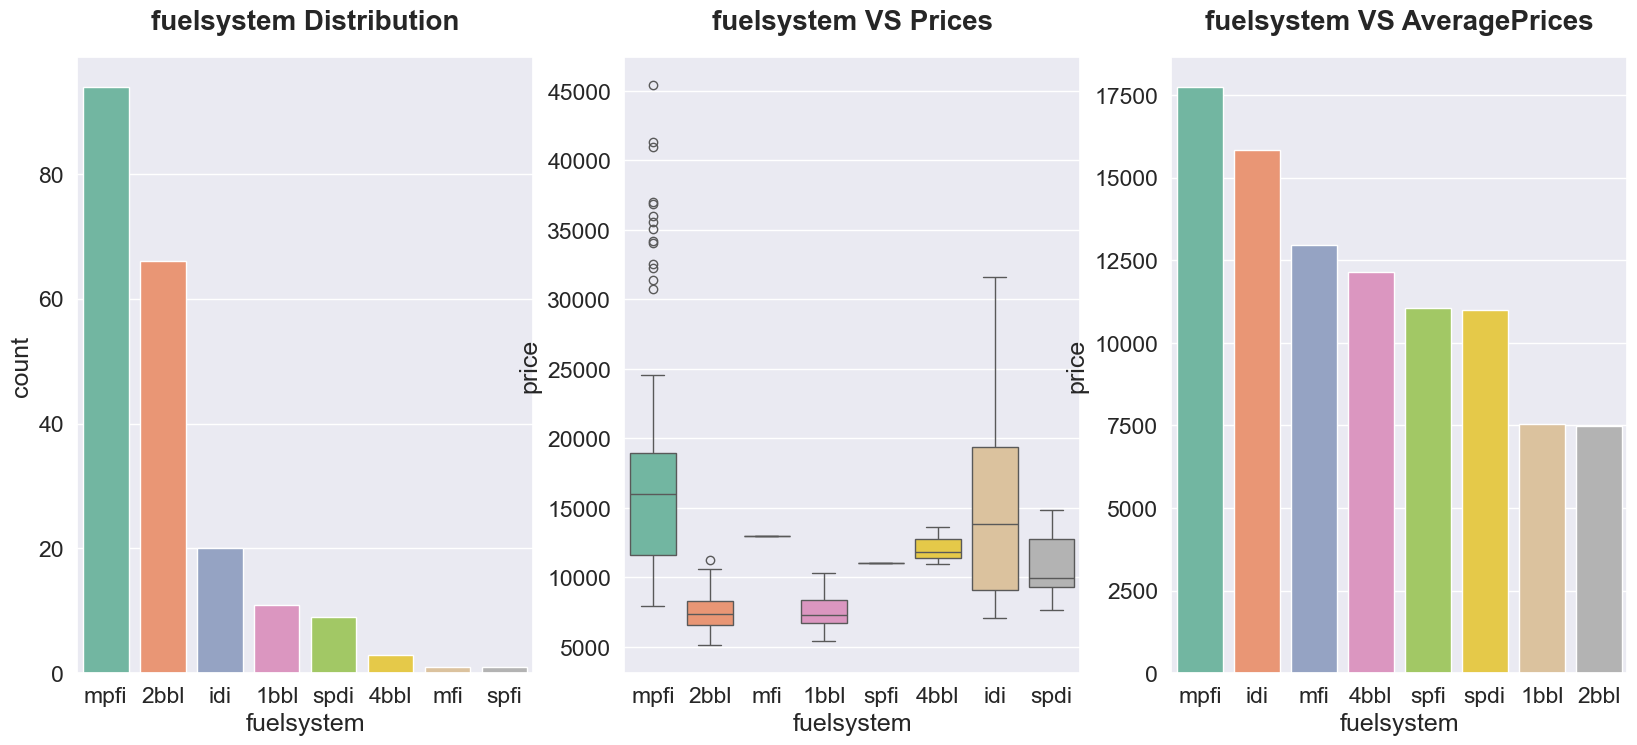

In [665]:
categorical_visualization("fuelsystem")

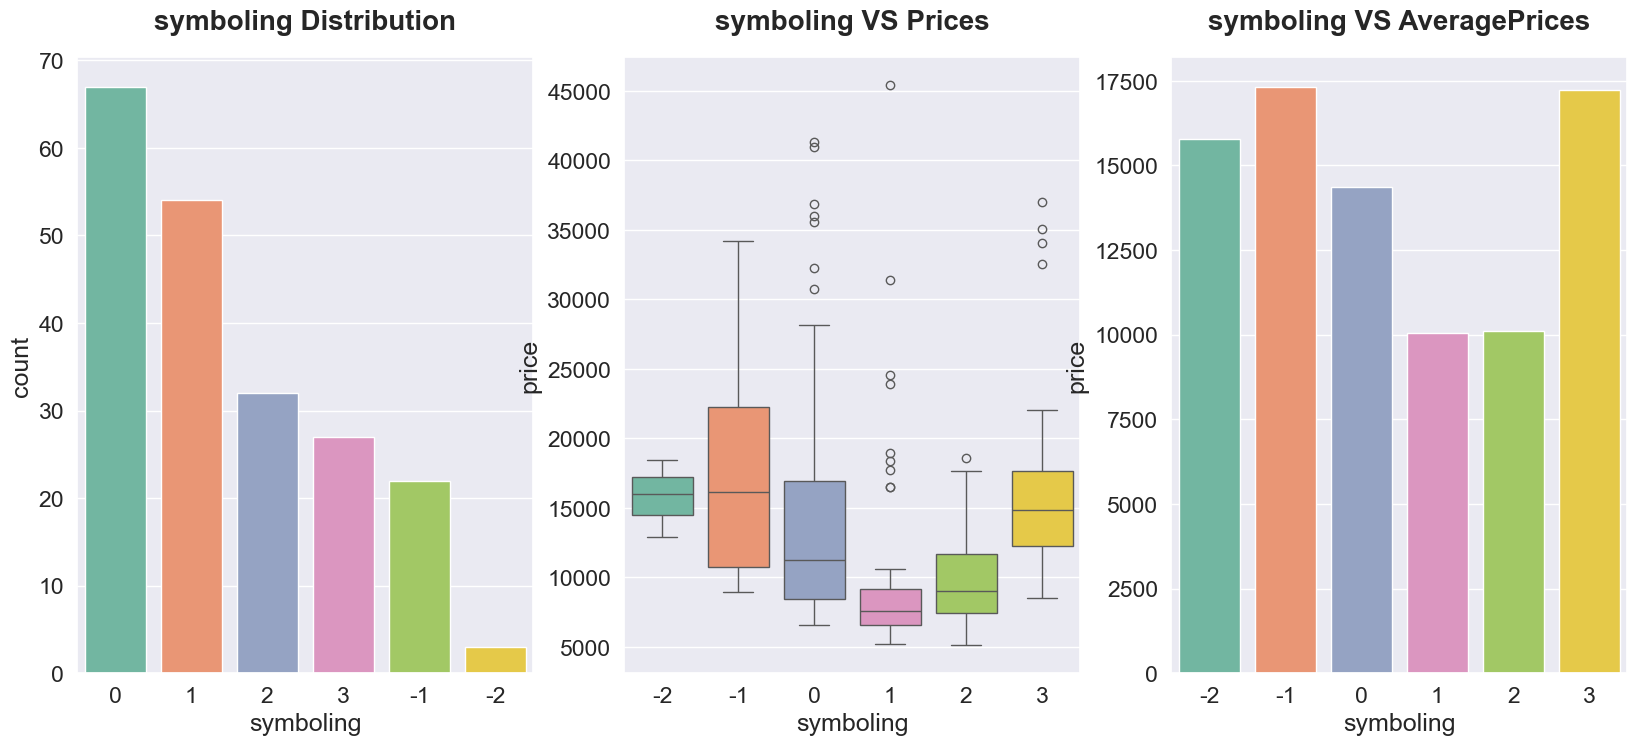

In [666]:
categorical_visualization("symboling")

In [667]:
#useful_categorical_columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','symboling']

<Axes: >

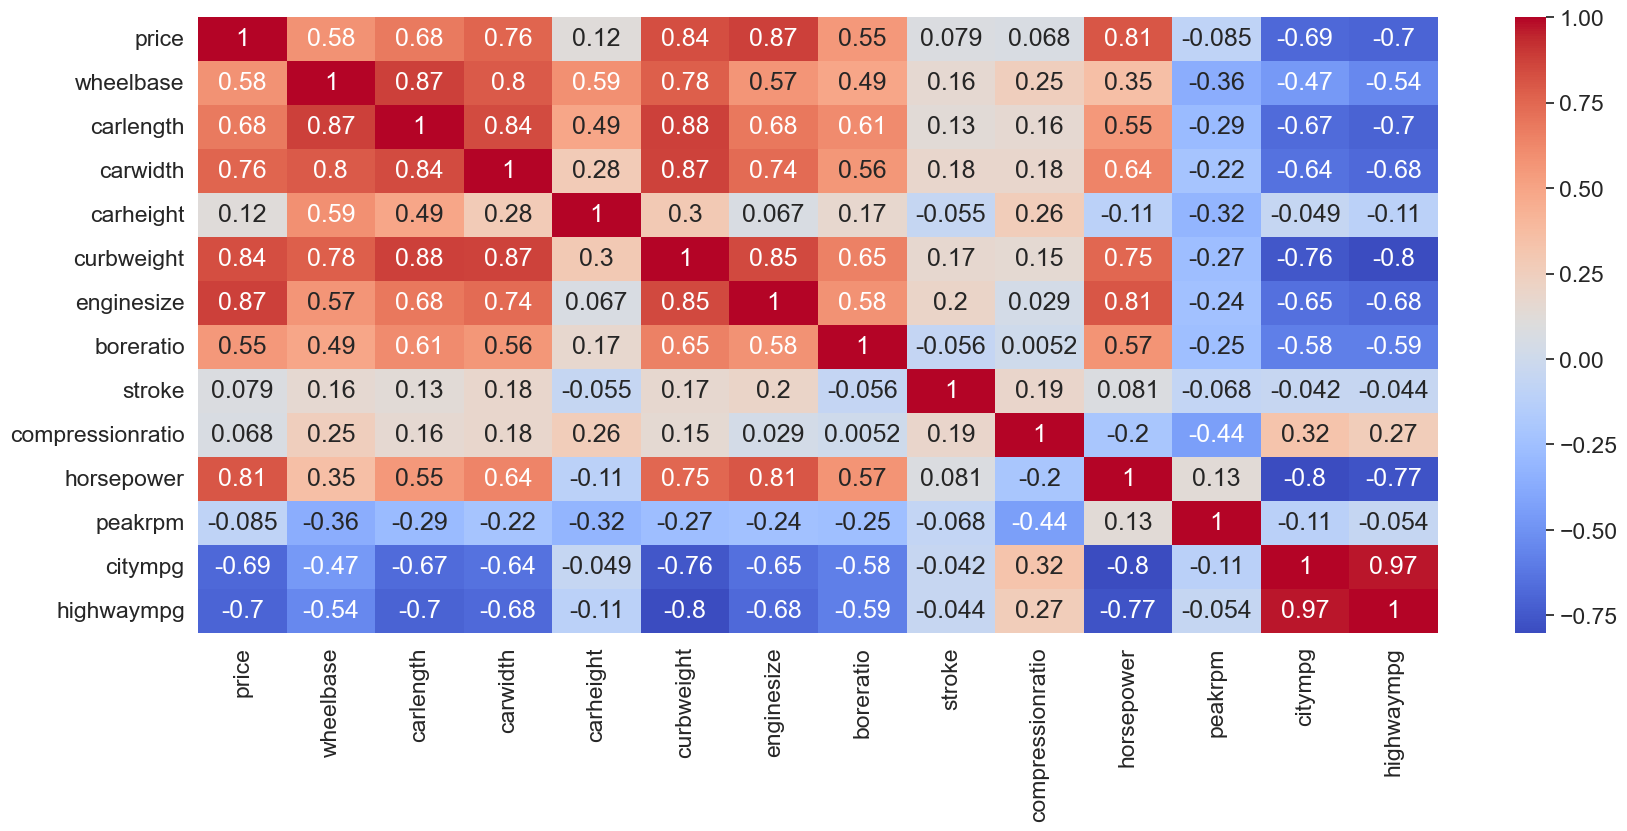

In [668]:
plt.figure(figsize=(20,8))
corr_cols=['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
corr_df=pd.DataFrame(df[corr_cols]).corr()
sns.heatmap(corr_df,annot=True,cmap='coolwarm')

In [669]:
#选出相关性较高的一些属性
corr_df[corr_df['price'].abs()>0.5].price

price         1.000000
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

In [670]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(25,8))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} VS price",fontweight="black",fontsize=20,pad=20)
        x=x+1

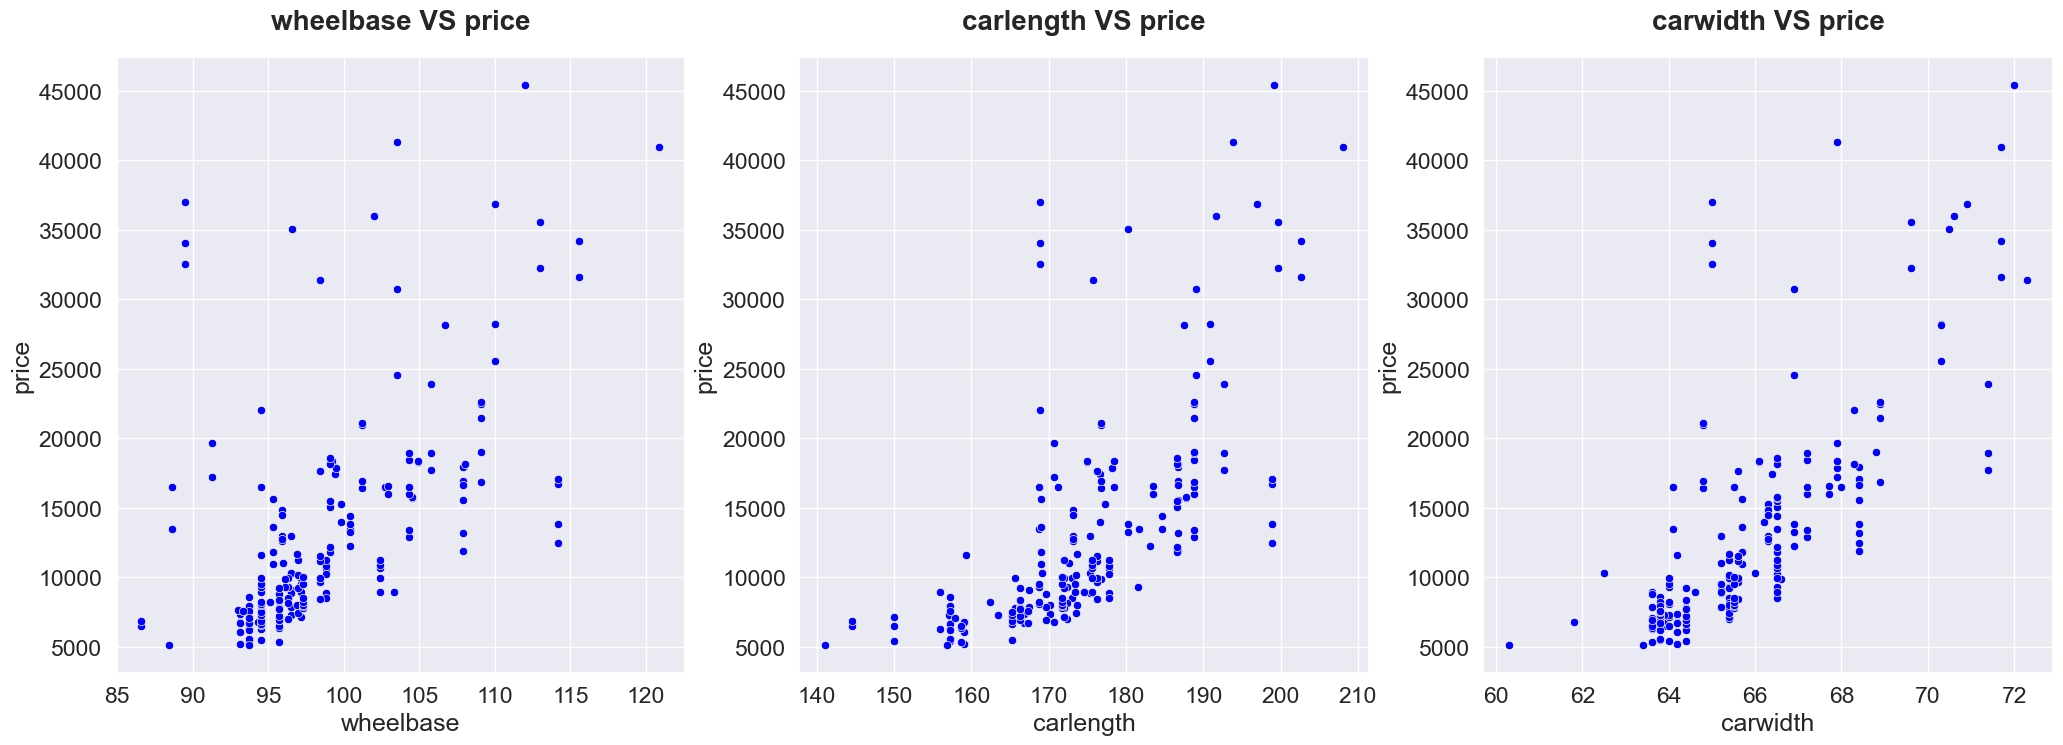

In [671]:
scatter_plot(['wheelbase','carlength','carwidth'])
#由以上散点图可知随着车长度和宽度的增加车的价格也增加，而虽然随着轴距的值增大汽车价格也增大，但是该图呈现出来的点比较分散，相关性并不太高。

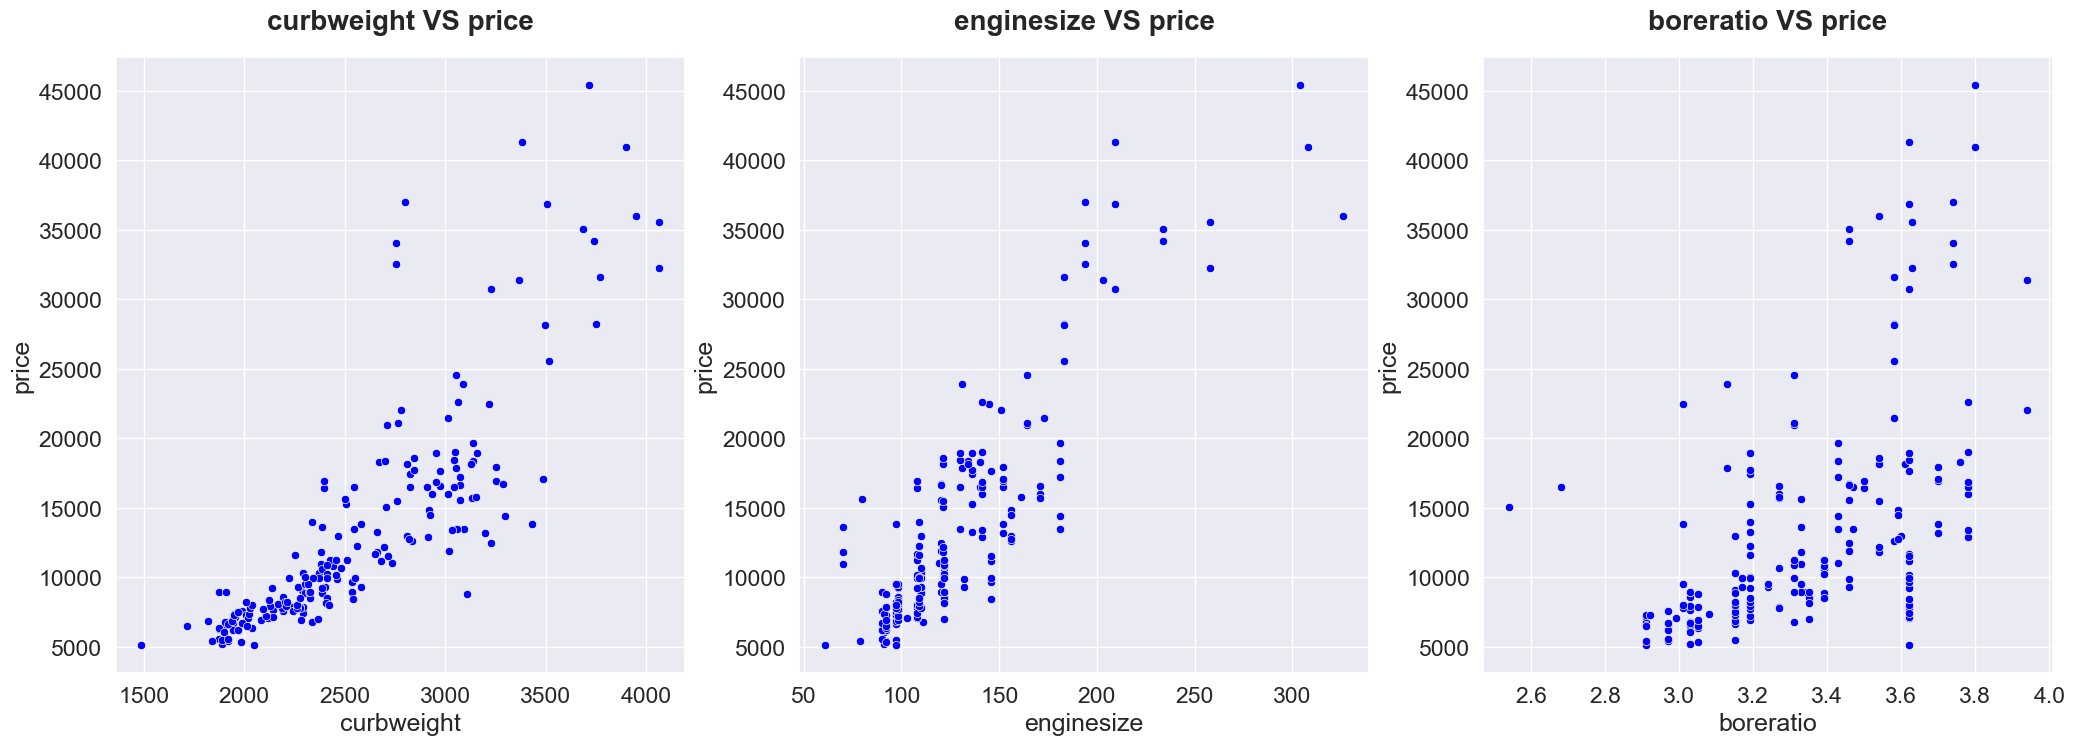

In [672]:
scatter_plot(['curbweight','enginesize','boreratio'])
#从上图可知汽车的curbweight和enginesize与汽车价格高度正相关,而虽然随着boreratio的值增大汽车价格也增大，但是该图呈现出来的点比较分散，相关性并不太高。

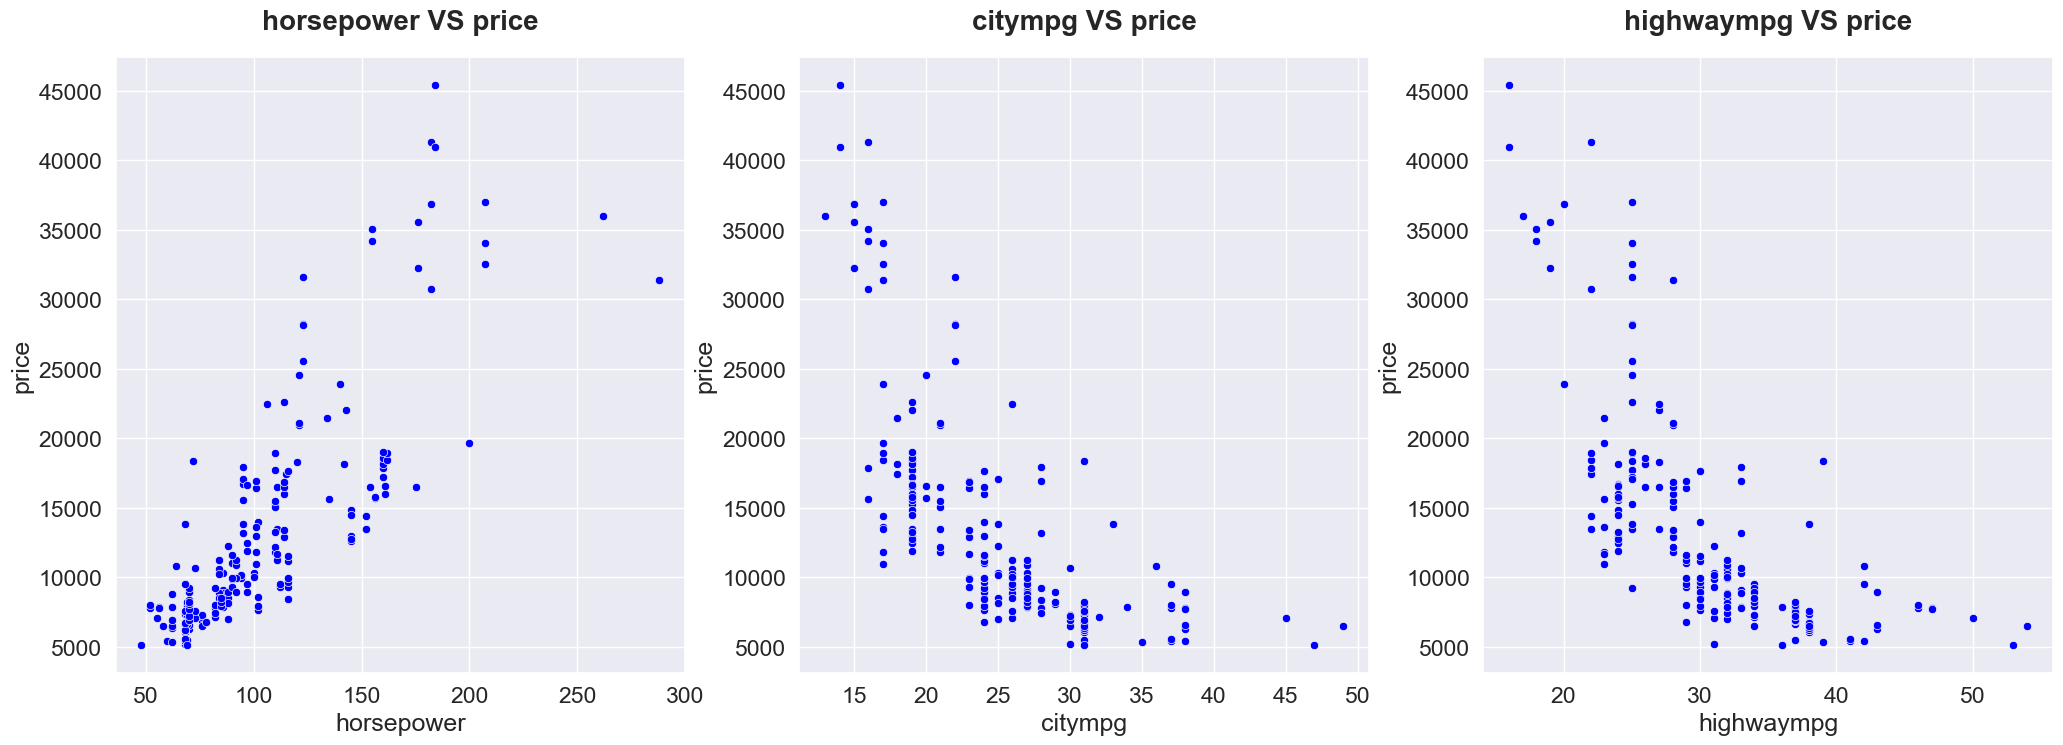

In [673]:
scatter_plot(['horsepower','citympg','highwaympg'])
#由上图可得随着汽车的马力增加，汽车价格也增加，而随着城市油耗和高速油耗的增加，汽车价格降低。

In [674]:
#useful_numerical_columns=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

很明显汽车品牌对于汽车的平均价格有着不可忽视的影响，因此要把汽车品牌的平均价格分为三个等级。

In [676]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2)
z

mean
CompanyName          
alfa-romero  15498.33
audi         17859.17
bmw          26118.75
buick        33647.00
chevrolet     6007.00
dodge         7875.44
honda         8184.69
isuzu         8916.50
jaguar       34600.00
mazda        10652.88
mercury      16503.00
mitsubishi    9239.77
nissan       10415.67
peugeot      15489.09
plymouth      7963.43
porsche      31400.50
renault       9595.00
saab         15223.33
subaru        8541.25
toyota        9885.81
volkswagen   10077.50
volvo        18063.18

In [677]:
df=df.merge(z,how='left',on='CompanyName')
df.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   CompanyName      mean  
0  alfa-romero  15498.33  
1  alfa-romero  15498.33  
2  alfa-romero  15498.33  
3         audi  17859.17  
4         audi  17859.17

In [678]:
bins=[0,10000,20000,40000]
car_bins=['Low','Mid','High']
df['CarsRange']=pd.cut(df['mean'],bins,right=False,labels=car_bins)
df.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   CompanyName      mean CarsRange  
0  alfa-romero  15498.33       Mid  
1  alfa-romero  15498.33       Mid  
2  alfa-romero  15498.33       Mid  
3         audi  17859.17       Mid  
4         audi  17859.17       Mid

In [679]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]
new_df.head()

fueltype aspiration doornumber      carbody drivewheel enginetype  \
0      gas        std        two  convertible        rwd       dohc   
1      gas        std        two  convertible        rwd       dohc   
2      gas        std        two    hatchback        rwd       ohcv   
3      gas        std       four        sedan        fwd        ohc   
4      gas        std       four        sedan        4wd        ohc   

  cylindernumber fuelsystem  wheelbase  carlength  carwidth  curbweight  \
0           four       mpfi       88.6      168.8      64.1        2548   
1           four       mpfi       88.6      168.8      64.1        2548   
2            six       mpfi       94.5      171.2      65.5        2823   
3           four       mpfi       99.8      176.6      66.2        2337   
4           five       mpfi       99.4      176.6      66.4        2824   

   enginesize  boreratio  horsepower  citympg  highwaympg    price CarsRange  
0         130       3.47         111       21          27  13495.0       Mid  
1         130       3.47         111       21          27  16500.0       Mid  
2         152       2.68         154       19          26  16500.0       Mid  
3         109       3.19         102       24          30  13950.0       Mid  
4         136       3.19         115       18          22  17450.0       Mid

In [680]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)
new_df.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0       88.6      168.8      64.1        2548         130       3.47   
1       88.6      168.8      64.1        2548         130       3.47   
2       94.5      171.2      65.5        2823         152       2.68   
3       99.8      176.6      66.2        2337         109       3.19   
4       99.4      176.6      66.4        2824         136       3.19   

   horsepower  citympg  highwaympg    price  fueltype_diesel  fueltype_gas  \
0         111       21          27  13495.0            False          True   
1         111       21          27  16500.0            False          True   
2         154       19          26  16500.0            False          True   
3         102       24          30  13950.0            False          True   
4         115       18          22  17450.0            False          True   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0            True             False            False            True   
1            True             False            False            True   
2            True             False            False            True   
3            True             False             True           False   
4            True             False             True           False   

   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                 True            False              False          False   
1                 True            False              False          False   
2                False            False               True          False   
3                False            False              False           True   
4                False            False              False           True   

   carbody_wagon  drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  \
0          False           False           False            True   
1          False           False           False            True   
2          False           False           False            True   
3          False           False            True           False   
4          False            True           False           False   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0             True             False         False           False   
1             True             False         False           False   
2            False             False         False           False   
3            False             False         False            True   
4            False             False         False            True   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_eight  \
0            False            False             False                 False   
1            False            False             False                 False   
2            False             True             False                 False   
3            False            False             False                 False   
4            False            False             False                 False   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                False                 True               False   
1                False                 True               False   
2                False                False                True   
3                False                 True               False   
4                 True                False               False   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                 False                  False               False   
1                 False                  False               False   
2                 False                  False               False   
3                 False                  False               False   
4                 False                  False               False   

   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0   

In [681]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   curbweight             205 non-null    int64  
 4   enginesize             205 non-null    int64  
 5   boreratio              205 non-null    float64
 6   horsepower             205 non-null    int64  
 7   citympg                205 non-null    int64  
 8   highwaympg             205 non-null    int64  
 9   price                  205 non-null    float64
 10  fueltype_diesel        205 non-null    bool   
 11  fueltype_gas           205 non-null    bool   
 12  aspiration_std         205 non-null    bool   
 13  aspiration_turbo       205 non-null    bool   
 14  doornumber_four        205 non-null    bool   
 15  doornu

In [682]:
bool_columns=['fueltype_diesel','fueltype_gas','aspiration_std','aspiration_turbo','doornumber_four','doornumber_two',
'carbody_convertible','carbody_hardtop','carbody_hatchback','carbody_sedan','carbody_wagon','drivewheel_4wd',
'drivewheel_fwd','drivewheel_rwd','enginetype_dohc','enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf',
'enginetype_ohcv','enginetype_rotor','cylindernumber_eight','cylindernumber_five','cylindernumber_four','cylindernumber_six',
'cylindernumber_three','cylindernumber_twelve','cylindernumber_two','fuelsystem_1bbl','fuelsystem_2bbl','fuelsystem_4bbl',
'fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','CarsRange_Low','CarsRange_Mid','CarsRange_High']
new_df[bool_columns] = new_df[bool_columns].astype(int)

In [683]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   curbweight             205 non-null    int64  
 4   enginesize             205 non-null    int64  
 5   boreratio              205 non-null    float64
 6   horsepower             205 non-null    int64  
 7   citympg                205 non-null    int64  
 8   highwaympg             205 non-null    int64  
 9   price                  205 non-null    float64
 10  fueltype_diesel        205 non-null    int64  
 11  fueltype_gas           205 non-null    int64  
 12  aspiration_std         205 non-null    int64  
 13  aspiration_turbo       205 non-null    int64  
 14  doornumber_four        205 non-null    int64  
 15  doornu

In [684]:
scaler=StandardScaler()
useful_numerical_columns=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']
new_df[useful_numerical_columns]=scaler.fit_transform(new_df[useful_numerical_columns])
new_df.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0  -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
1  -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
2  -0.708596  -0.231513 -0.190566    0.514882    0.604046  -2.404880   
3   0.173698   0.207256  0.136542   -0.420797   -0.431076  -0.517266   
4   0.107110   0.207256  0.230001    0.516807    0.218885  -0.517266   

   horsepower   citympg  highwaympg    price  fueltype_diesel  fueltype_gas  \
0    0.174483 -0.646553   -0.546059  13495.0                0             1   
1    0.174483 -0.646553   -0.546059  16500.0                0             1   
2    1.264536 -0.953012   -0.691627  16500.0                0             1   
3   -0.053668 -0.186865   -0.109354  13950.0                0             1   
4    0.275883 -1.106241   -1.273900  17450.0                0             1   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                0               1   
1               1                 0                0               1   
2               1                 0                0               1   
3               1                 0                1               0   
4               1                 0                1               0   

   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                    1                0                  0              0   
1                    1                0                  0              0   
2                    0                0                  1              0   
3                    0                0                  0              1   
4                    0                0                  0              1   

   carbody_wagon  drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  \
0              0               0               0               1   
1              0               0               0               1   
2              0               0               0               1   
3              0               0               1               0   
4              0               1               0               0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0                1                 0             0               0   
1                1                 0             0               0   
2                0                 0             0               0   
3                0                 0             0               1   
4                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  cylindernumber_eight  \
0                0                0                 0                     0   
1                0                0                 0                     0   
2                0                1                 0                     0   
3                0                0                 0                     0   
4                0                0                 0                     0   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    0                   1   
3                    0                    1                   0   
4                    1                    0                   0   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  

In [685]:
x=new_df.drop(columns=['price'])
y=new_df['price']

In [686]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [687]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred=model.predict(x_train)
    x_test_pred=model.predict(x_test)
    a=r2_score(y_train,x_train_pred)*100
    b=r2_score(y_test,x_test_pred)*100
    train_score.append(a)
    test_score.append(b)
    print(f"Score of {model} model train data:",a)
    print(f"Score of {model} model test data:",b)

In [688]:
model_prediction(LinearRegression())

Score of LinearRegression() model train data: 96.03347906215075
Score of LinearRegression() model test data: 88.26307199077361


In [689]:
model_prediction(DecisionTreeRegressor())

Score of DecisionTreeRegressor() model train data: 99.86537119069865
Score of DecisionTreeRegressor() model test data: 91.218122550804


In [742]:
model_prediction(RandomForestRegressor())

Score of RandomForestRegressor() model train data: 98.75115503955986
Score of RandomForestRegressor() model test data: 95.62127869494834
